In [2]:
import pandas as pd
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy import signal
import parseTraces as pt

In [3]:
step = pd.read_csv('./step_template.csv')

In [4]:
step.head()

,acc,gyro
0,-1.242370,0.035163
1,-1.271202,-0.015238
2,-1.251582,-0.044221
3,-1.222887,-0.088736
4,-1.181840,-0.118862


In [ ]:
def dtw(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix


In [ ]:
def dtw2(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [ ]:
test = signal.resample(step['acc'] + np.random.normal(-0.5,0.5,55), 65)
test = (test - np.mean(test)) / np.std(test)

In [ ]:
test.plot()
step['acc'].plot()

In [ ]:
dtw_matrix2 = dtw2(test, step['acc'], 20)
plt.imshow(dtw_matrix2)#[55,55]
print(dtw_matrix2[55,55])

In [5]:
subj_dict = {'p1.1_Female_20-29_170-179cm_Hand_held.out':[1607,5393],
              'p2.2_Male_20-29_180-189cm_Hand_held.out':[1999,5930],
              'p3.1_Male_20-29_170-179cm_Hand_held.out':[3057,8623],
              'p4.1_Male_20-29_170-179cm_Hand_held.out':[891,5425],
              'p5.1_Female_20-29_160-169cm_Hand_held.out':[1087,4956],
              'p6.1_Male_15-19_180-189cm_Hand_held.out':[2410,7400],
              'p7.1_Male_20-29_180-189cm_Hand_held.out':[1573,5249],
              'p8.1_Male_20-29_170-179cm_Hand_held.out':[1557,7596],
              'p9.1_Female_15-19_160-169cm_Hand_held.out':[1562,5614],
              #'p10.1_Male_20-29_170-179cm_Hand_held.dat':[6123,11092],
              'p11.1_Male_20-29_170-179cm_Hand_held.out':[1513,6361],
              #'p12.2_Male_15-19_180-189cm_Hand_held.dat':[3061,6744],
              'p13.1_Female_20-29_160-169cm_Hand_held.out':[2214,6828],
              'p14.1_Male_20-29_160-169cm_Hand_held.out':[1878,6203],
              'p15.1_Male_20-29_180-189cm_Hand_held.out':[1241,5295],
              'p16.1_Male_15-19_180-189cm_Hand_held.out':[3006,7487],
              'p17.1_Female_20-29_150-159cm_Hand_held.out':[2311,7629],
              'p18.1_Male_20-29_180-189cm_Hand_held.out':[971,5275],
              'p19.1_Female_20-29_150-159cm_Hand_held.out':[1869,6563],
              'p20.1_Male_20-29_170-179cm_Hand_held.out':[1573,5717],
              'p21.1_Male_20-29_180-189cm_Hand_held.out':[1346,4763],
              'p22.1_Male_20-29_170-179cm_Hand_held.out':[963,6582],
              #'p23.1_Female_20-29_160-169cm_Hand_held.out':[1363,6353],
              'p24.1_Male_20-29_170-179cm_Hand_held.out':[2182,5767],
              'p25.1_Female_20-29_170-179cm_Hand_held.out':[1359,5910],
              'p26.2_Female_20-29_150-159cm_Hand_held.out':[1166,5829]}
              #'p27.1_Male_15-19_170-179cm_Hand_held.dat':[7325,11053]}


In [47]:
#list(subj_dict.items())[0][0]

accTs, accData, gyroTs, gyroData, magnTs, magnData = pt.parseTrace(f'./walking_data/{list(subj_dict.items())[0][0]}')

acc_z = [item[2] for item in accData][list(subj_dict.items())[0][1][0]:list(subj_dict.items())[0][1][1]]
gyro_x = [item[2] for item in gyroData][list(subj_dict.items())[0][1][0]:list(subj_dict.items())[0][1][1]]

acc_z = (acc_z - np.mean(acc_z)) / np.std(acc_z)
gyro_x = (gyro_x - np.mean(gyro_x)) / np.std(gyro_x)

template = np.array([step['acc'],step['gyro']]).T
stream = np.array([acc_z,gyro_x]).T

print(len(template))

print(stream)

print(stream.shape[0])

55
[[ 0.04096155  0.61330305]
 [-0.13479231  0.60021347]
 [-0.28514982  0.58385094]
 ...
 [-0.01071247 -1.3468349 ]
 [ 0.01318077 -1.43191582]
 [-0.0400482  -1.49081766]]
3786


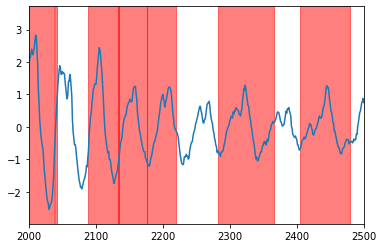

71


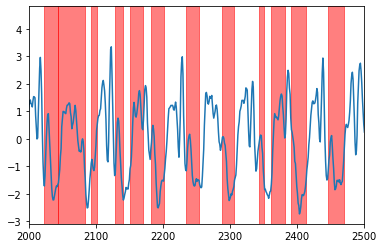

97


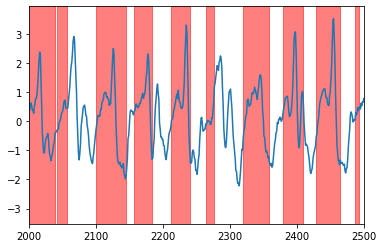

60


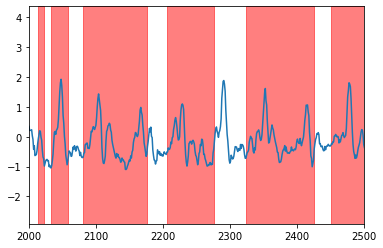

62


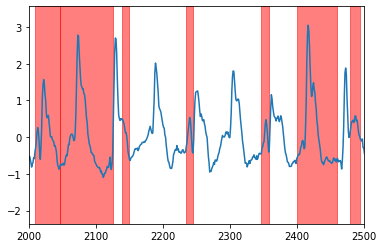

68


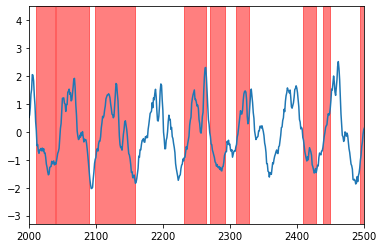

60


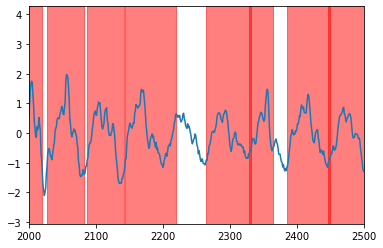

63


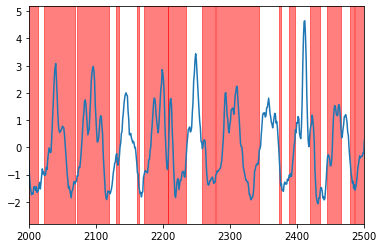

81


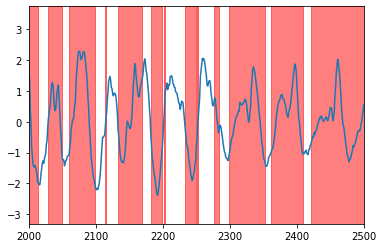

65


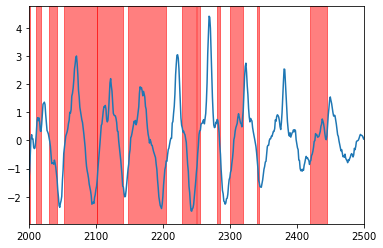

72


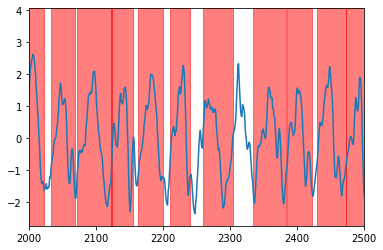

63


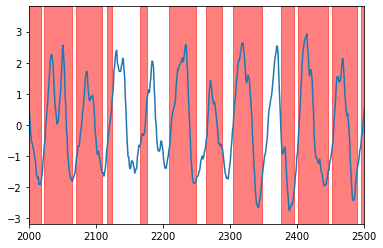

64


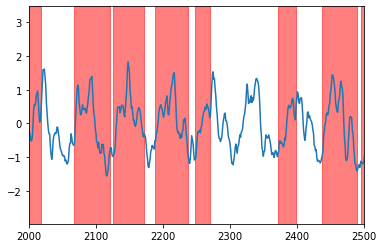

73


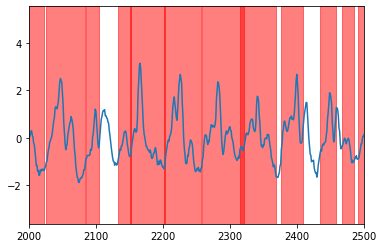

70


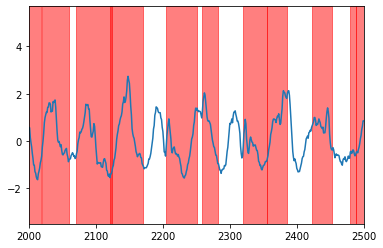

60


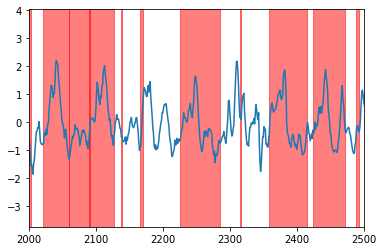

77


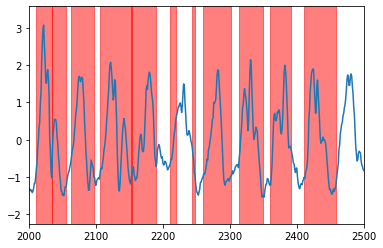

73


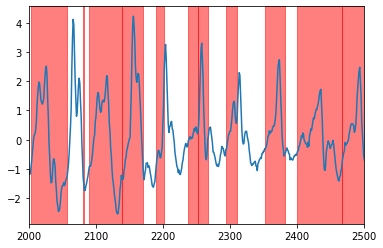

77


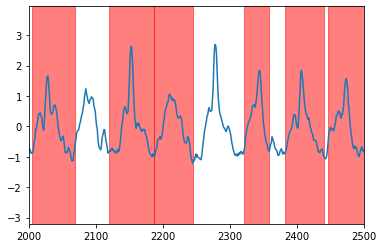

57


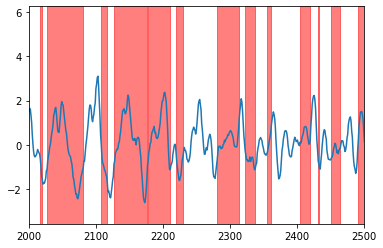

84


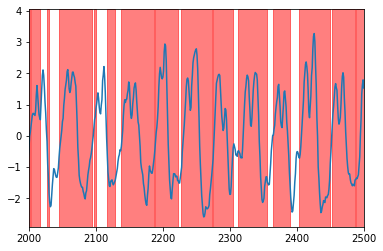

83


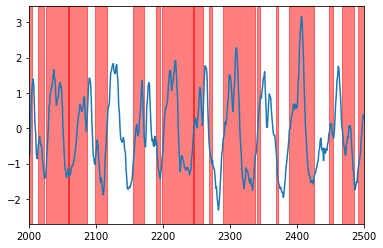

87


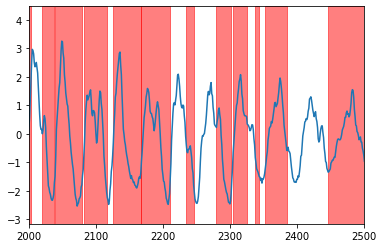

69


In [61]:
for subj in subj_dict.items():
    
    accTs, accData, gyroTs, gyroData, magnTs, magnData = pt.parseTrace(f'./walking_data/{subj[0]}')
    
    acc_z = [item[2] for item in accData][list(subj_dict.items())[0][1][0]:list(subj_dict.items())[0][1][1]]
    #gyro_x = [item[2] for item in gyroData][list(subj_dict.items())[0][1][0]:list(subj_dict.items())[0][1][1]]

    acc_z = (acc_z - np.mean(acc_z)) / np.std(acc_z)
    #gyro_x = (gyro_x - np.mean(gyro_x)) / np.std(gyro_x)
    
    #HERE DEFINE 
    #1)template consisting of numerical data points 
    #2)stream consisting of numerical data points
    template = step['acc']
    stream = acc_z
    
    #the threshold for the matching process has to be chosen by the user - yet in reality the choice of threshold is a non-trivial problem regarding the quality of the matching process
    #Getting Epsilon from the user 

    #epsilon = input("Please define epsilon: ")
    #epsilon = float(epsilon)

    epsilon = float('inf') #max distance threshold

    #SPRING
    #1.Requirements
    n = len(template)
    D_recent = [float("inf")]*(n)
    D_now=[0]*(n)
    S_recent=[0]*(n)
    S_now=[0]*(n)
    d_rep=float("inf")
    J_s=float("inf")
    J_e=float("inf")
    check=0
 
    #check/output
    matches=[]

    #calculation of accumulated distance for each incoming value
    def accdist_calc (incoming_value, temp, Distance_new, Distance_recent):
        for i in range(len(temp)):
            if i == 0:
                #start point is corner
                ## need to square ??
                #Distance_new[i] = abs(incoming_value-temp[i])
                Distance_new[i] = (incoming_value-temp[i])**2
            else:
                #next point is previous value plus most efficient step
                ## need to square??
                #Distance_new[i] = abs(incoming_value-temp[i])+min(Distance_new[i-1], Distance_recent[i], Distance_recent[i-1])
                Distance_new[i] = ((incoming_value[0]-temp[i][0])**2) + ((incoming_value[1]-temp[i][1])**2) + min(Distance_new[i-1], Distance_recent[i], Distance_recent[i-1])
        return Distance_new

    #deduce starting point for each incoming value
    def startingpoint_calc (template_length, starting_point_recent, starting_point_new, Distance_new, Distance_recent):
        for i in range (template_length):
                if i == 0:
                    #here j+1 instead of j, because of the programm counting from 0 instead of from 1
                    starting_point_new[i] = j+1
                else:
                    if Distance_new[i-1] == min(Distance_new[i-1], Distance_recent[i], Distance_recent[i-1]):
                        starting_point_new[i] = starting_point_new[i-1]                    
                    elif Distance_recent[i] == min(Distance_new[i-1], Distance_recent[i], Distance_recent[i-1]):
                        starting_point_new[i] = starting_point_recent[i]                    
                    elif Distance_recent[i-1] == min(Distance_new[i-1], Distance_recent[i], Distance_recent[i-1]):
                        starting_point_new[i] = starting_point_recent[i-1]                    
        return starting_point_new     

    #2.Calculation for each incoming point x.t - simulated here by simply calculating along the given static list
    for j in range (stream.shape[0]): # change to while loop?
        
        x = stream[j]
        accdist_calc (x,template,D_now,D_recent) # takes Distance_new as input and returns updated version
        startingpoint_calc (n, S_recent, S_now, D_now, D_recent) # takes S_now (starting_point_now) as input and returns updated version

        #Report any matching subsequence
        if D_now[n-1] <= epsilon: # last item in path list == distance, if less than thresh then: 
            if D_now[n-1] <= d_rep: # 
                d_rep = D_now[n-1] # most recent minimum distance
                J_s = S_now[n-1] # updated starting point         
                J_e = j+1 # ending point
                #print("REPORT: Distance "+str(d_rep)+" with a starting point of "+str(J_s)+" and ending at "+str(J_e))              

        #Identify optimal subsequence
        for i in range (n): # for i in length of template
            if D_now[i] >= d_rep or S_now[i] > J_e: # if accumulated distance at i position in template is greater than or equal to last position minimum distance
                check = check+1                     # OR deduced starting point for i position is greater than the ending point
        if check == n: # if check equals length of template, then add match
            #print("MATCH: Distance "+str(d_rep)+" with a starting point of "+str(J_s)+" and ending at "+str(J_e))
            matches.append(str(d_rep)+","+str(J_s)+","+str(J_e))
            d_rep = float("inf")
            J_s = float("inf")
            J_e = float("inf")
            check = 0 
        else:
            check = 0

        #define the recently calculated distance vector as "old" distance
        for i in range (n):
            D_recent[i] = D_now[i]
            S_recent[i] = S_now[i]
            
    match_idx = []
    for idx,match in enumerate(matches):
        for match2 in matches:
            list1 = [int(match.split(',')[1]), int(match.split(',')[2])]
            list2 = [int(match2.split(',')[1]), int(match2.split(',')[2])]
            if list1 != list2 and list1[0] >= list2[0] and list1[1] <= list2[1]:
                match_idx.append(idx)
                
    matches = [match for idx,match in enumerate(matches) if idx not in match_idx]
    
    fig, ax = plt.subplots()
    ax.plot(acc_z)
    for match in matches:
        ax.axvspan(int(match.split(',')[1]), int(match.split(',')[2]), alpha=0.5, color='red')
    
    plt.xlim([2000,2500])
    plt.show()
    print(len(matches))
    
    #fig, ax = plt.subplots()
    #ax.plot(gyro_x)
    #for match in matches:
        #ax.axvspan(int(match.split(',')[1]), int(match.split(',')[2]), alpha=0.4, color='green')
    
    #plt.xlim([1500,2500])
    #plt.show()
    #print(len(matches))